In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import nltk
import pycountry
from sklearn.feature_extraction.text import CountVectorizer
import random
import requests
import json

%matplotlib inline
%load_ext autoreload
%autoreload 2

# There's a lot of columns in the DF. 
# Therefore, we add this option so that we can see more columns
pd.options.display.max_columns = 100

# WordCloud on Raw data

First, we create the wordcloud with the Raw data. So, we just load the texts, put them together and display the word cloud.

In [2]:
emails = pd.read_csv('./hillary-clinton-emails/Emails.csv')
emails.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,MetadataDocumentClass,ExtractedSubject,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,HRC_Email_296,FW: Wow,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,HRC_Email_296,NaN,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,HRC_Email_296,Re: Chris Stevens,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,HRC_Email_296,FVV: Cairo Condemnation - Final,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,HRC_Email_296,NaN,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


In [3]:
text = list(emails.ExtractedBodyText) + list(emails.ExtractedSubject)
text_str = " ".join(str(x) for x in text)
text_str = text_str.replace("\n", " ")

(-0.5, 399.5, 199.5, -0.5)

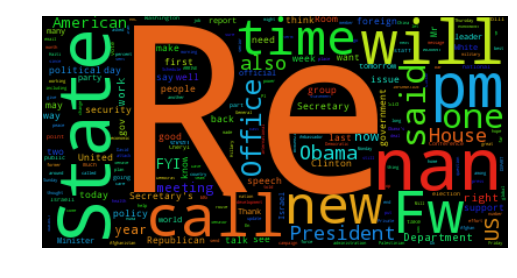

In [4]:
# Generate a word cloud image
wordcloud = WordCloud().generate(text_str)
plt.imshow(wordcloud)
plt.axis("off")

# Add stop words and other things =)

In [5]:
stopwords = list(STOPWORDS)
stopwords.append('nan')
stopwords.append('will')
len(stopwords)

185

In [6]:
array_words = text_str.split(" ")
small_words = []

In [7]:
for i in range(len(array_words)):
    if len(array_words[i]) <= 2:
        if array_words[i] not in stopwords:
            stopwords.append(array_words[i])

In [8]:
wc = WordCloud(max_words=1000, stopwords=set(stopwords))

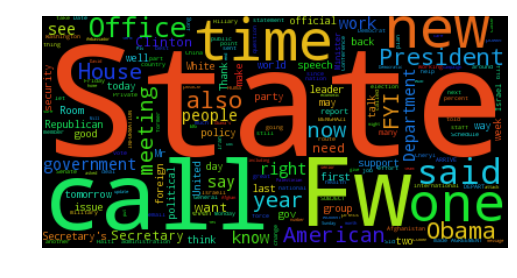

In [9]:
wc.generate(text_str)
plt.imshow(wc, cmap=plt.cm.gray)
plt.axis("off")
plt.show()

In [24]:
trump_coloring = np.array(Image.open("./other/trump.png"))
wc_colored = WordCloud(max_words=100, mask=trump_coloring, stopwords=stopwords, random_state=1)
wc_colored.generate(text_str)

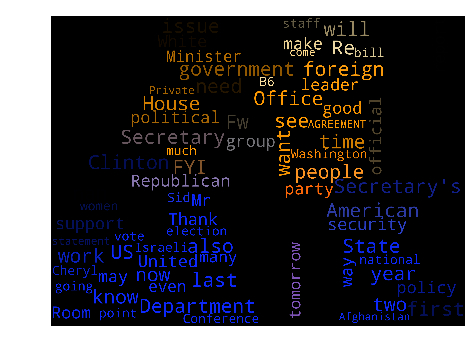

In [28]:
# create coloring from image
image_colors = ImageColorGenerator(trump_coloring)
# plt.imshow(wc_colored.recolor(color_func=image_colors))
plt.imshow(wc_colored)
plt.axis("off")
plt.show()

In [12]:
wc.to_file("trump<3clinton.png")


We should add a lot of different things in the stop words.. For example, we see that FYI is used a lot. I'm not really motivated to do that, therefore I let you do it. xoxo

# Sentimental Analysis on the countries

In [13]:
countries = {}

bullshit_countries = ["Antarctica"]

for country in pycountry.countries:
    if country.name not in bullshit_countries:
        list_to_search = []
        list_to_search.append(country.name.split(",")[0].lower())
        list_to_search.append(country.alpha_2)
        list_to_search.append(country.alpha_3)
        try:
            str_text = requests.get("https://restcountries.eu/rest/v1/alpha/" + country.alpha_2.lower()).text
            dic = json.loads(str_text)
            list_to_search.append(dic["capital"].lower())
        except:
            print(str_text)
            pass

        if country.name == "Syrian Arab Republic":
            list_to_search.append("syria")
        if country.name == "Russian Federation":
            list_to_search.append("russia")
        countries[country.name] = list_to_search

In [14]:
countries["UK"] = ['uk', 'united kingdom', 'great britain']
countries["United States"].append("U.S.")
countries["United States"].append("U.S.A.")

In [15]:
len(countries)

249

In [16]:
countries["United States"]

['united states', 'US', 'USA', 'washington, d.c.', 'U.S.', 'U.S.A.']

In [17]:
stopwords = list(STOPWORDS)

cited_countries = {}
for i in range(100):
    body = str(emails.iloc[i].ExtractedBodyText)
    body_lower = body.lower()
    subject = str(emails.iloc[i].ExtractedSubject).lower()
    
    body = body.split(" ")
    body.extend(body_lower.split(" "))
    
    subject = subject.split(" ")
    if body != "nan":  
        for ctr in countries:
            for citation in countries[ctr]:
                if (citation in body or citation in subject):
                    if ctr in cited_countries:
                        cited_countries[ctr]["nbr_citation"] += 1
                        cited_countries[ctr]["citation"].append(citation)
                    else:
                        subdic = {}
                        subdic["sentiment"] = []
                        subdic["average_sentiment"] = 0
                        subdic["nbr_citation"] = 1
                        subdic["citation"] = [citation]
                        cited_countries[ctr] = subdic
                    break
    

In [18]:
cited_countries

{'Andorra': {'average_sentiment': 0,
  'citation': ['AND', 'AND'],
  'nbr_citation': 2,
  'sentiment': []},
 'Armenia': {'average_sentiment': 0,
  'citation': ['AM', 'AM'],
  'nbr_citation': 2,
  'sentiment': []},
 'Chad': {'average_sentiment': 0,
  'citation': ['chad'],
  'nbr_citation': 1,
  'sentiment': []},
 'China': {'average_sentiment': 0,
  'citation': ['china'],
  'nbr_citation': 1,
  'sentiment': []},
 'Egypt': {'average_sentiment': 0,
  'citation': ['cairo',
   'egypt',
   'egypt',
   'egypt',
   'egypt',
   'egypt',
   'egypt',
   'egypt',
   'egypt'],
  'nbr_citation': 9,
  'sentiment': []},
 'France': {'average_sentiment': 0,
  'citation': ['france', 'france'],
  'nbr_citation': 2,
  'sentiment': []},
 'India': {'average_sentiment': 0,
  'citation': ['IN'],
  'nbr_citation': 1,
  'sentiment': []},
 'Iran, Islamic Republic of': {'average_sentiment': 0,
  'citation': ['iran', 'iran'],
  'nbr_citation': 2,
  'sentiment': []},
 'Iraq': {'average_sentiment': 0,
  'citation': ['